<a href="https://colab.research.google.com/github/Amitparikh1/CADS_DataScienceWorkshop/blob/main/Intro_To_DataScience_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read in the data 

In [2]:
## Read from a csv
all_data = pd.read_csv("most-recent-field-data-elements.csv")

## Command to look at the first 5 rows of data
all_data.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


Clean the Data

In [3]:
## Select the columns that we want 
df = all_data[['CIPDESC','CREDDESC','DEBTMEDIAN','MD_EARN_WNE']]


## Select rows that are about Bachelors Degrees
df = df.loc[df['CREDDESC']=="Bachelors Degree"]
## Select rows that have values for the median earnings and median debt
df = df.loc[df['MD_EARN_WNE']!= "PrivacySuppressed"]
df = df.loc[df['DEBTMEDIAN']!= "PrivacySuppressed"]


## Convert Median Earnings Column to a numeric value from string
df[['DEBTMEDIAN','MD_EARN_WNE']] = df[['DEBTMEDIAN','MD_EARN_WNE']].astype(int)
## Combine rows by their field of study and average their median earnings 
df = df.groupby(df['CIPDESC'],as_index=False).mean()

## Sort by highest to lowest paying 
df = df.sort_values(by='MD_EARN_WNE',ascending=False)

## Finding certain values
# print(df.loc[df['CIPDESC']=='Computer Science.'])
# print(df.loc[df['CIPDESC']=='Statistics.'])


Plotting the Data

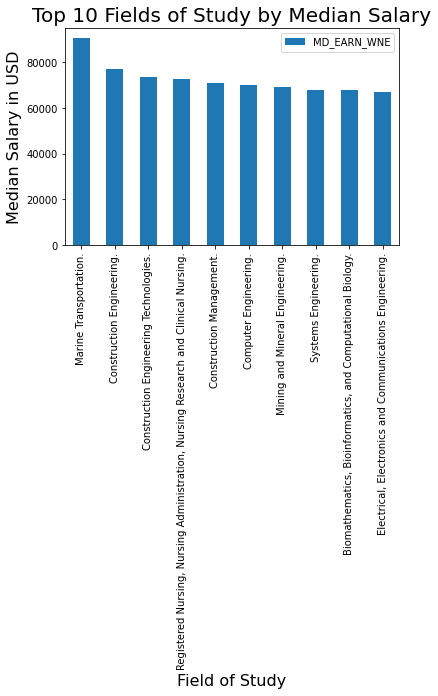

In [4]:
###  Bar Chart of the top 10 median salaries by Field of Study
## Get the top 10 rows
top_ten = df.iloc[0:10]

top_ten.plot.bar(x='CIPDESC',y='MD_EARN_WNE')
plt.xlabel("Field of Study",fontsize=16)
plt.ylabel("Median Salary in USD",fontsize=16)
plt.title("Top 10 Fields of Study by Median Salary",fontsize=20)
plt.show()

Median Salary to Debt Ratio

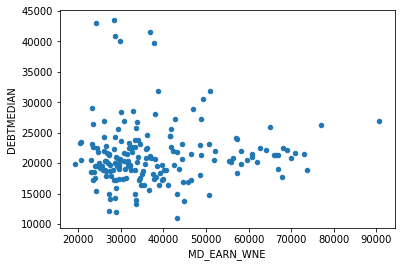

,CIPDESC,DEBTMEDIAN,MD_EARN_WNE,EarningsToDebtRatio
144,Peace Studies and Conflict Resolution.,11000.000000,43300.0,3.936364
47,Construction Engineering Technologies.,18916.600000,73640.0,3.892877
21,"Biomathematics, Bioinformatics, and Computatio...",17786.000000,67800.0,3.811987
43,Computer Science.,19124.107143,66825.0,3.494281
175,Statistics.,14718.750000,50775.0,3.449682


In [6]:
## Scatter plot of debt to earnings (doesn't show much)
df.plot.scatter(x='MD_EARN_WNE',y='DEBTMEDIAN')
plt.show()
## Add a new column
df['EarningsToDebtRatio'] = df['MD_EARN_WNE']/df['DEBTMEDIAN']
df = df.sort_values(by='EarningsToDebtRatio',ascending=False)
df.head()

Earnings and Debt by Degree Level or Histogram of all median salaries